<a href="https://colab.research.google.com/github/wozzin/AI_deeplearning/blob/main/Deep_abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


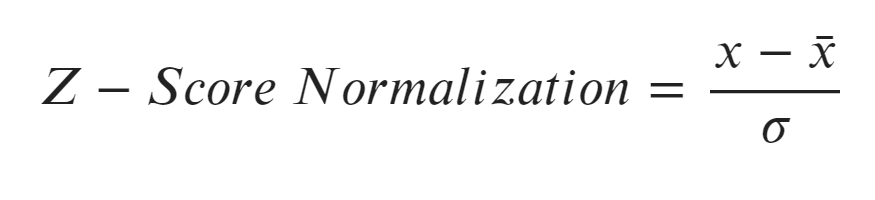

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Deep/abalone.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
import csv

with open('/content/drive/MyDrive/Deep/abalone.csv') as csvfile:
  csvreader = csv.reader(csvfile)
  next(csvreader) #변수이름 출력 넘기기 위해 next 사용

  rows = []
  for row in csvreader:
    rows.append(row)

In [ ]:
rows[:5]

[['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15'],
 ['M', '0.35', '0.265', '0.09', '0.2255', '0.0995', '0.0485', '0.07', '7'],
 ['F', '0.53', '0.42', '0.135', '0.677', '0.2565', '0.1415', '0.21', '9'],
 ['M', '0.44', '0.365', '0.125', '0.516', '0.2155', '0.114', '0.155', '10'],
 ['I', '0.33', '0.255', '0.08', '0.205', '0.0895', '0.0395', '0.055', '7']]

In [ ]:
# M F I 를 원핫백터 처리 
# 독립변수 총 10개가 됨, (m.f,i 각각 개수)
input_cnt = 10
output_cnt = 1
data = np.zeros([len(rows) , input_cnt + output_cnt ])
print(data.shape)
for n, row in enumerate(rows):
  if  row[0] == 'M' : data[n, 0] = 1
  if  row[0] == 'F' : data[n, 1] = 1
  if  row[0] == 'I' : data[n, 2] = 1
  data[n, 3 :] = row [1:]

(4177, 11)


In [ ]:
data

array([[ 1.    ,  0.    ,  0.    , ...,  0.101 ,  0.15  , 15.    ],
       [ 1.    ,  0.    ,  0.    , ...,  0.0485,  0.07  ,  7.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  0.2875,  0.308 ,  9.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.261 ,  0.296 , 10.    ],
       [ 1.    ,  0.    ,  0.    , ...,  0.3765,  0.495 , 12.    ]])

In [ ]:
train_ratio = 0.85

test_begin_index = int(data.shape[0] * train_ratio)
print( "test_begin_index : " , test_begin_index) # 테스트데이터 인덱스 위치 확인

test_begin_index :  3550


In [ ]:
data.shape[0] # 데이터전체갯수

4177

In [ ]:
shuffle_map = np.arange(data.shape[0])
print(shuffle_map[:10])
np.random.shuffle(shuffle_map)
print(shuffle_map[:10])

[0 1 2 3 4 5 6 7 8 9]
[3182  522 2873 3149  580 2239 1298 2397 2779  903]


In [ ]:
train_data = data[shuffle_map[ : test_begin_index]]
test_data  = data[shuffle_map[test_begin_index : ]]

In [ ]:
train_X , train_Y = train_data[:, :-output_cnt], train_data[:,-output_cnt:]
test_X , test_Y = test_data[:,:-output_cnt], test_data[:,-output_cnt:]

In [ ]:
# 행 방향의 평균값이 아닌 열 방향 평균값 구하기 > axis = 0
train_X_mean = np.mean(train_X, axis=0)
train_X_std = train_X.std(axis=0)


In [ ]:
train_X -= train_X_mean
train_X /= train_X_std

In [ ]:
test_X -= train_X_mean
test_X /= train_X_std

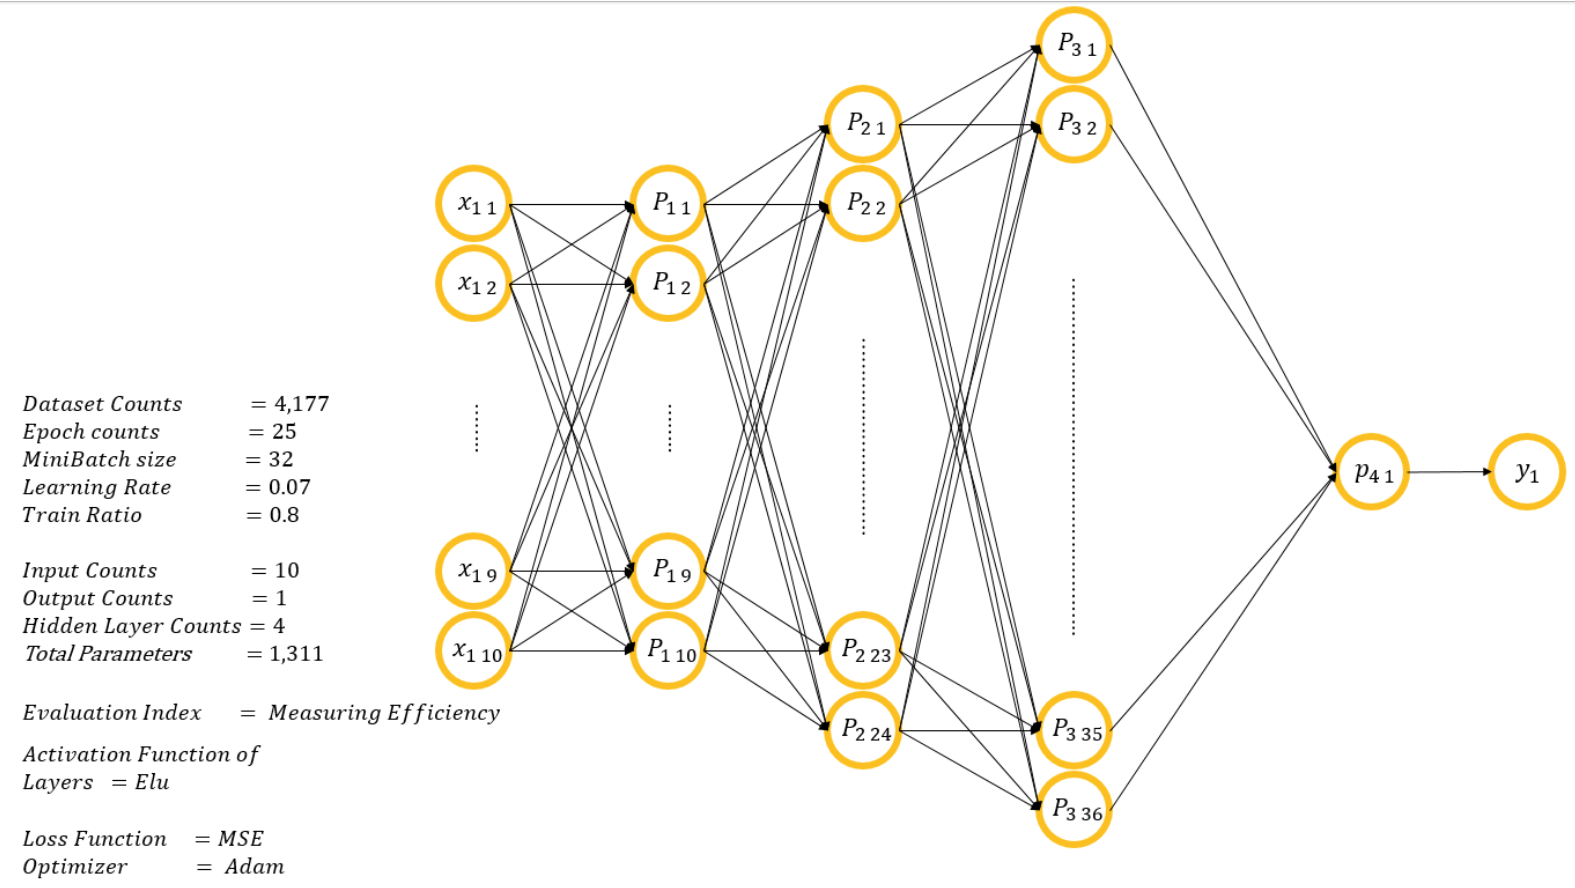

In [ ]:
GJ_NET_MODEL_V1 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(units = 10,
                                                             activation = 'elu',
                                                             input_shape = (10,)),
                                       tf.keras.layers.Dense(units = 24,
                                                             activation = 'elu',
                                                             ),
                                       tf.keras.layers.Dense(units = 36,
                                                             activation = 'elu'),
                                       tf.keras.layers.Dense(units = 1,
                                                             )
])

In [ ]:
GJ_NET_MODEL_V1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                264       
_________________________________________________________________
dense_2 (Dense)              (None, 36)                900       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 37        
Total params: 1,311
Trainable params: 1,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
GJ_NET_MODEL_V1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        loss = 'mse')

In [ ]:
history_1 = GJ_NET_MODEL_V1.fit(train_X, train_Y, epochs=25, batch_size=32,
                    validation_split = 0.2)

Epoch 1/25
89/89 [==============================] - 1s 4ms/step - loss: 18.3949 - val_loss: 5.6609
Epoch 2/25
89/89 [==============================] - 0s 2ms/step - loss: 5.2849 - val_loss: 5.0730
Epoch 3/25
89/89 [==============================] - 0s 2ms/step - loss: 5.0218 - val_loss: 5.2501
Epoch 4/25
89/89 [==============================] - 0s 2ms/step - loss: 4.9806 - val_loss: 4.6983
Epoch 5/25
89/89 [==============================] - 0s 2ms/step - loss: 4.7500 - val_loss: 4.7381
Epoch 6/25
89/89 [==============================] - 0s 2ms/step - loss: 4.7793 - val_loss: 5.0117
Epoch 7/25
89/89 [==============================] - 0s 2ms/step - loss: 4.8464 - val_loss: 4.8450
Epoch 8/25
89/89 [==============================] - 0s 2ms/step - loss: 4.6031 - val_loss: 4.6865
Epoch 9/25
89/89 [==============================] - 0s 2ms/step - loss: 4.6577 - val_loss: 5.0427
Epoch 10/25
89/89 [==============================] - 0s 2ms/step - loss: 4.5734 - val_loss: 4.9327
Epoch 11/25
89/89 

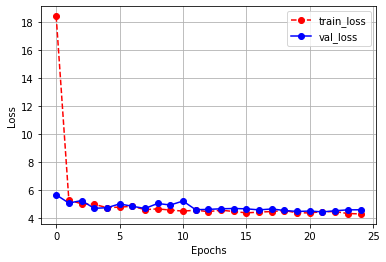

In [ ]:
plt.plot(history_1.history['loss'], '--o', color = 'red', label = 'train_loss')
plt.plot(history_1.history['val_loss'], '-o', color = 'blue', label = 'val_loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

In [ ]:
GJ_NET_MODEL_V1.evaluate(test_X, test_Y)

20/20 [==============================] - 0s 1ms/step - loss: 4.0577


4.057665824890137

In [ ]:
pred_Y = GJ_NET_MODEL_V1.predict(test_X)
print(pred_Y[:10])

[[ 9.453109 ]
 [11.892962 ]
 [10.36304  ]
 [ 9.092215 ]
 [13.279271 ]
 [ 8.872449 ]
 [10.341171 ]
 [ 7.1400867]
 [12.44629  ]
 [ 9.051738 ]]


In [ ]:
test_Y[:10]

array([[ 9.],
       [13.],
       [13.],
       [12.],
       [17.],
       [ 9.],
       [11.],
       [ 7.],
       [13.],
       [ 7.]])

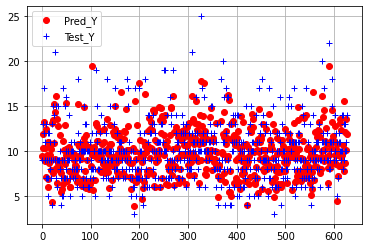

In [ ]:
plt.plot(pred_Y[:], 'o', color='red', label = 'Pred_Y')
plt.plot(test_Y[:], '+', color='blue', label = 'Test_Y')

plt.legend()
plt.grid()
plt.show()

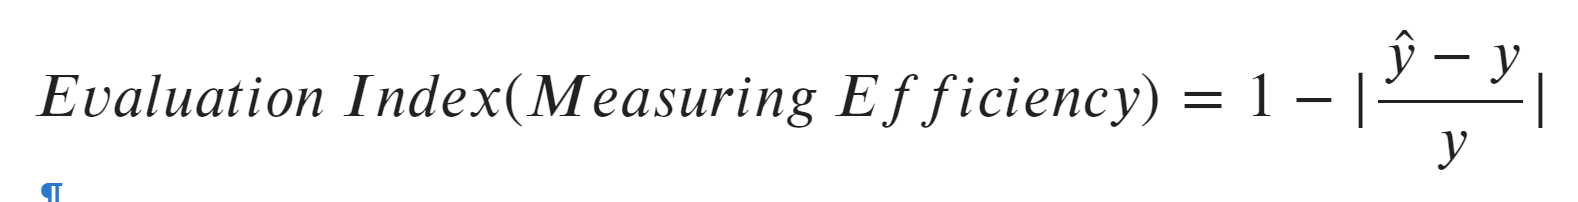

In [ ]:
np.abs((pred_Y - test_Y) / test_Y)

array([[5.03454208e-02],
       [8.51567342e-02],
       [2.02843079e-01],
       [2.42315451e-01],
       [2.18866404e-01],
       [1.41723421e-02],
       [5.98935214e-02],
       [2.00123787e-02],
       [4.25930757e-02],
       [2.93105398e-01],
       [6.66992399e-02],
       [2.00052452e-01],
       [2.09899630e-02],
       [7.99198945e-02],
       [6.71333737e-03],
       [2.79909134e-01],
       [3.26055646e-01],
       [1.28038753e-01],
       [1.26632622e-01],
       [1.34831111e-01],
       [7.72417509e-03],
       [7.27249384e-02],
       [1.03042666e-01],
       [1.59111712e-01],
       [1.27221888e-02],
       [8.49801472e-02],
       [1.79527071e-02],
       [3.16849164e-01],
       [7.15142568e-02],
       [1.63800376e-01],
       [6.54616356e-02],
       [5.02410889e-01],
       [3.15032535e-02],
       [1.49702835e-01],
       [1.26210743e-01],
       [8.80622864e-02],
       [1.81506538e-01],
       [3.52239609e-03],
       [3.56218219e-01],
       [8.30049515e-02],


In [ ]:
acc = 1 - np.mean(np.abs((pred_Y - test_Y) / test_Y))
print("GJ_NET_MODEL_V1 - ACC : {} %".format(np.round(acc * 100,3)))

GJ_NET_MODEL_V1 - ACC : 85.954 %


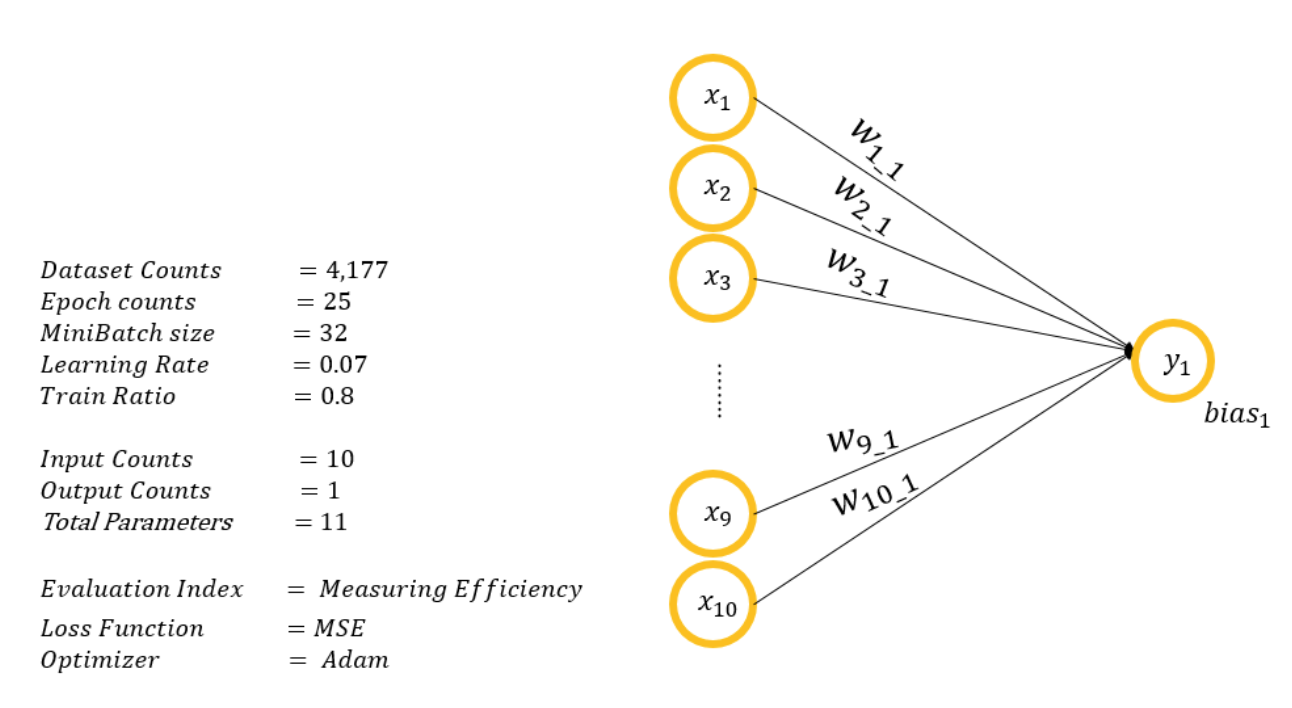

In [ ]:
GJ_NET_MODEL_2 = tf.keras.Sequential([
                                      tf.keras.layers.Dense(units = 1,
                                                            input_shape = (10, ))
]
)

In [ ]:
GJ_NET_MODEL_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [ ]:
GJ_NET_MODEL_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
                       loss = 'mse')

In [ ]:
history_2 = GJ_NET_MODEL_2.fit(train_X, train_Y,
                   epochs = 200, batch_size = 32,
                   validation_split = 0.2,
                   callbacks = [tf.keras.callbacks.EarlyStopping(patience= 5,
                                                                 monitor = 'val_loss')]) #조기중단기능 / callbacks 

Epoch 1/200
89/89 [==============================] - 0s 3ms/step - loss: 59.8093 - val_loss: 25.3542
Epoch 2/200
89/89 [==============================] - 0s 1ms/step - loss: 14.1081 - val_loss: 7.0899
Epoch 3/200
89/89 [==============================] - 0s 1ms/step - loss: 5.9656 - val_loss: 5.0870
Epoch 4/200
89/89 [==============================] - 0s 2ms/step - loss: 5.1783 - val_loss: 5.1742
Epoch 5/200
89/89 [==============================] - 0s 1ms/step - loss: 5.1714 - val_loss: 4.8991
Epoch 6/200
89/89 [==============================] - 0s 2ms/step - loss: 5.1076 - val_loss: 5.0013
Epoch 7/200
89/89 [==============================] - 0s 1ms/step - loss: 5.1455 - val_loss: 4.9541
Epoch 8/200
89/89 [==============================] - 0s 1ms/step - loss: 5.1688 - val_loss: 4.9481
Epoch 9/200
89/89 [==============================] - 0s 1ms/step - loss: 5.0866 - val_loss: 4.9424
Epoch 10/200
89/89 [==============================] - 0s 1ms/step - loss: 5.0582 - val_loss: 4.8633
Epoch 

In [ ]:
GJ_NET_MODEL_2.evaluate(test_X, test_Y)

20/20 [==============================] - 0s 1ms/step - loss: 4.5182


4.518197536468506

In [ ]:
pred_Y = GJ_NET_MODEL_2.predict(test_X)
print(pred_Y[:5])

[[ 9.722328]
 [10.659442]
 [ 9.458248]
 [ 8.754693]
 [11.763818]]


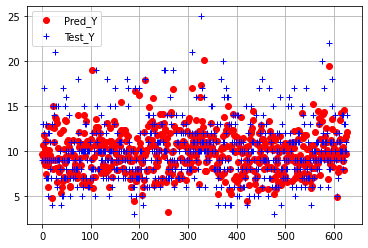

In [ ]:
plt.plot(pred_Y[:], 'o', color='red', label = 'Pred_Y')
plt.plot(test_Y[:], '+', color='blue', label = 'Test_Y')

plt.legend()
plt.grid()
plt.show()

In [ ]:
acc = 1 - np.mean(np.abs((pred_Y - test_Y) / test_Y))
print("GJ_NET_MODEL_V2 - ACC : {} %".format(np.round(acc * 100,3)))

GJ_NET_MODEL_V2 - ACC : 84.789 %


In [ ]:
 # 학습된 웨이트 w , 바이어스 b 값 확인하기
 GJ_NET_MODEL_2_prams = GJ_NET_MODEL_2.get_weights()
 print(GJ_NET_MODEL_2_prams)

[array([[ 0.06588694],
       [ 0.2650236 ],
       [-0.22644116],
       [-0.15357974],
       [ 1.1676178 ],
       [ 0.4141459 ],
       [ 2.6390584 ],
       [-3.5503795 ],
       [-0.7563852 ],
       [ 1.8929284 ]], dtype=float32), array([9.855455], dtype=float32)]


In [ ]:
print("weight : \n" , GJ_NET_MODEL_2_prams[0])
print("bias : \n" , GJ_NET_MODEL_2_prams[1])

weight : 
 [[ 0.06588694]
 [ 0.2650236 ]
 [-0.22644116]
 [-0.15357974]
 [ 1.1676178 ]
 [ 0.4141459 ]
 [ 2.6390584 ]
 [-3.5503795 ]
 [-0.7563852 ]
 [ 1.8929284 ]]
bias : 
 [9.855455]


In [ ]:
# 모델 저장하기
GJ_NET_MODEL_2.save('my_model.h5')

In [ ]:
load_model = tf.keras.models.load_model('/content/my_model.h5')

In [ ]:
load_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [ ]:
load_model.evaluate(test_X, test_Y)

20/20 [==============================] - 0s 935us/step - loss: 4.5182


4.518197536468506

In [ ]:
pred_Y = load_model.predict(test_X)
print(pred_Y[:10])

[[ 9.722328 ]
 [10.659442 ]
 [ 9.458248 ]
 [ 8.754693 ]
 [11.763818 ]
 [ 8.441997 ]
 [10.1843195]
 [ 7.39313  ]
 [11.100098 ]
 [10.113804 ]]
